In [1]:
from model import Model
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import RFE
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import mutual_info_classif
from sklearn.tree import ExtraTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import ConfusionMatrixDisplay

import pandas as pd
import numpy as np
import altair as alt
import matplotlib.pyplot as plt
import seaborn as sns


In [15]:
train = pd.read_csv('./training_set.csv')
train = train.drop(columns=['Unnamed: 0','X34'])
train.shape

(3910, 57)

# Model with All Linear SVC Classifier

In [3]:
X = train.drop(columns=['Y'])
y = train['Y']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=4535, stratify=y, shuffle=True)

c = Model(30, LogisticRegression())
c.fit(X_train, y_train)

test_pred = c.predict(X_test)
train_pred = c.predict(X_train)
accuracy_score(test_pred, y_test), precision_score(y_pred=test_pred, y_true=y_test), recall_score(y_pred=test_pred, y_true=y_test), roc_auc_score(y_test, c.predict_proba(X_test))

(0.9156010230179028,
 0.9228070175438596,
 0.8566775244299675,
 0.9670426881536087)

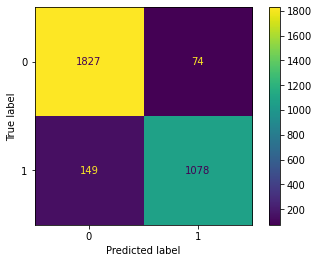

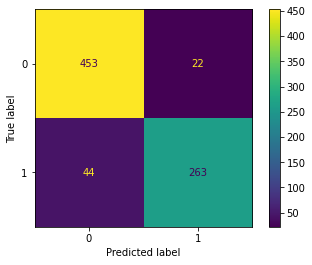

In [4]:
ConfusionMatrixDisplay.from_predictions(y_train, train_pred)
ConfusionMatrixDisplay.from_predictions(y_test, test_pred)

# Model with Different Classifiers

In [11]:
classifiers = [SVC(kernel='linear',probability=True), SVC(kernel='rbf',probability=True), SVC(kernel='sigmoid',probability=True), LogisticRegression(), GaussianNB(), ExtraTreeClassifier(),
                DecisionTreeClassifier(), LogisticRegression()]
c1 = Model(30, classifiers)

c1.fit(X_train, y_train)

test_pred = c1.predict(X_test)
train_pred = c1.predict(X_train)
accuracy_score(test_pred, y_test), precision_score(y_pred=test_pred, y_true=y_test), recall_score(y_pred=test_pred, y_true=y_test), roc_auc_score(y_test, c1.predict_proba(X_test))

(0.9194373401534527,
 0.8910256410256411,
 0.9055374592833876,
 0.9741813817932454)

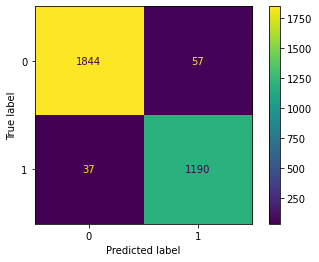

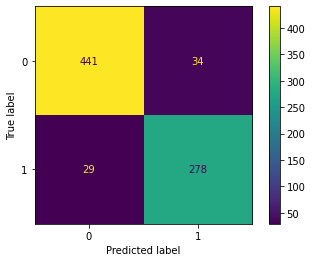

In [12]:
ConfusionMatrixDisplay.from_predictions(y_train, train_pred)
ConfusionMatrixDisplay.from_predictions(y_test, test_pred)

# Model Evaluation

In [20]:
from tqdm import tqdm
from datetime import datetime

num_features = [10, 20, 30, 40, 50]
prec_LR = []
recall_LR = []
prec_LinearSVC = []
recall_LinearSVC = []

for i in num_features:
    s = datetime.now()
    
    LRclf = Model(i, LogisticRegression())
    LSVCclf = Model(i, SVC(kernel='linear',probability=True))
    
    LRclf.fit(X_train,y_train)
    LSVCclf.fit(X_train,y_train)
    
    LRclf_pred = LRclf.predict(X_test)
    LSVCclf_pred = LSVCclf.predict(X_test)
    
    prec_LR.append(precision_score(y_pred=LRclf_pred, y_true=y_test))
    prec_LinearSVC.append(precision_score(y_pred=LSVCclf_pred, y_true=y_test))
    recall_LR.append(recall_score(y_pred=LRclf_pred, y_true=y_test))
    recall_LinearSVC.append(recall_score(y_pred=LSVCclf_pred, y_true=y_test))
    
    print('Done in {} min for {} features'.format((datetime.now()-s).total_seconds()/60, i))

Done in 0.6731827666666667 min for 10 features
Done in 1.6072585 min for 20 features
Done in 2.8263079666666666 min for 30 features
Done in 3.6599592333333333 min for 40 features
Done in 5.228819166666667 min for 50 features


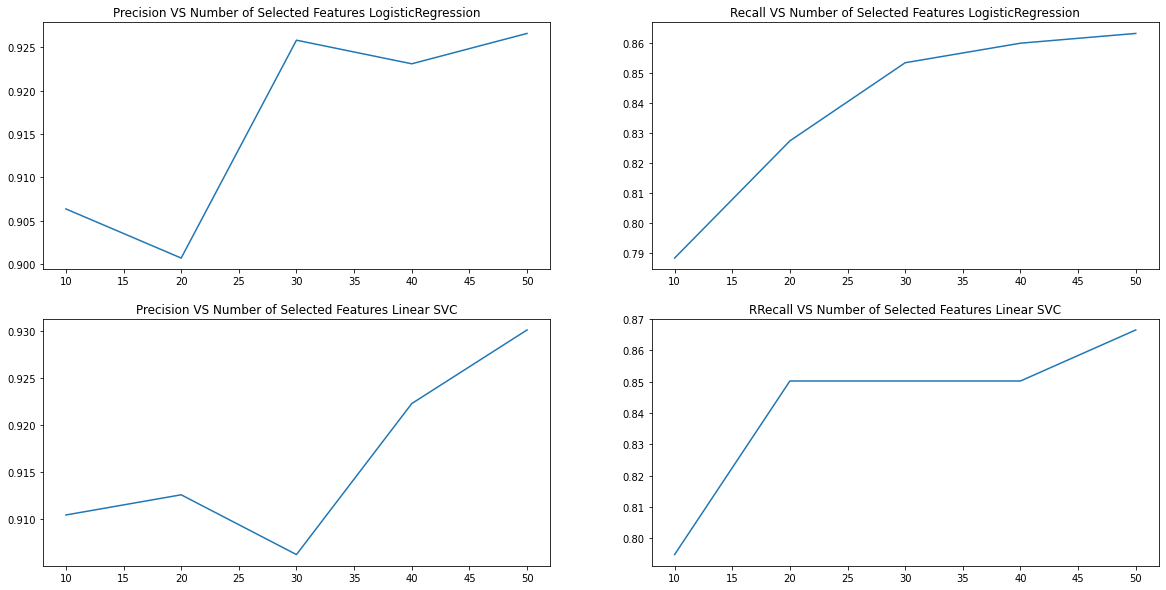

In [36]:
fig, ax = plt.subplots(2,2 ,figsize=(20, 10))
ax[0][0].title.set_text('Precision VS Number of Selected Features LogisticRegression')
ax[0][0].plot(num_features, prec_LR)
ax[0][1].title.set_text('Recall VS Number of Selected Features LogisticRegression')
ax[0][1].plot(num_features, recall_LR)
ax[1][0].title.set_text('Precision VS Number of Selected Features Linear SVC')
ax[1][0].plot(num_features, prec_LinearSVC)
ax[1][1].title.set_text('RRecall VS Number of Selected Features Linear SVC')
ax[1][1].plot(num_features, recall_LinearSVC)


# Model Predictions on the test Using the Best Model

In [40]:
test = pd.read_csv('./test_set.csv')
test = test.drop(columns=['Unnamed: 0','X34'])
test.shape

(691, 56)

In [38]:
best = Model(30, LogisticRegression())
best.fit(X, y)
train_pred = best.predict(X)
accuracy_score(train_pred, y), precision_score(y_pred=train_pred, y_true=y), recall_score(y_pred=train_pred, y_true=y), roc_auc_score(y, c1.predict_proba(X))

(0.9179028132992327,
 0.9335239456754825,
 0.8513689700130378,
 0.9926079295782686)

In [41]:
test['predictions'] = best.predict(test)
test.shape

(691, 57)

In [42]:
test.to_csv('./submission.csv', index=False)